# Image Denoising with Autoencoders

#### About
- Autoencoders are primarily **unsupervised** deep learning models, as they do not need labeled data.
- They are often used in tasks like **dimensionality reduction**, **data compression**, and **denoising**.
- Although autoencoders are unsupervised, they can sometimes be used in **semi-supervised** or **self-supervised** learning frameworks depending on the application.


![ar](https://miro.medium.com/v2/resize:fit:600/0*LtrxkZrn87VTYML6.png)



#### **Objective:**
- Train an autoencoder to remove noise from images. The model will take noisy images as input and learn to output the corresponding clean images, essentially performing denoising.

#### **Dataset:**
You can use a dataset of images such as **CIFAR-10** (which contains 60,000 32x32 color images in 10 classes) or **MNIST** (handwritten digits). You’ll add noise to these images to simulate real-world conditions.

- **Dataset:** CIFAR-10 or MNIST (available in TensorFlow and Keras).
  - [MNIST Dataset](https://www.kaggle.com/c/digit-recognizer/data)
  - [CIFAR-10 Dataset](https://www.cs.toronto.edu/~kriz/cifar.html)

#### **Steps for the Project:**

### **1. Import Required Libraries:**
You'll need libraries for deep learning, image manipulation, and data preprocessing.


In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

from tensorflow.keras import layers, models, datasets



### **2. Load and Preprocess Data:**

Load the MNIST or CIFAR-10 dataset and normalize the images to have values between 0 and 1. Then, introduce noise into the images to simulate noisy data.

For this example, we'll use the **MNIST** dataset and add Gaussian noise to the images:


In [42]:
# Load MNIST dataset
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

# Normalize and reshape
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (-1, 28, 28, 1))
x_test = np.reshape(x_test, (-1, 28, 28, 1))


In [43]:

# Add random noise to the images
def add_noise(imgs, noise_factor=0.5):
    noisy_imgs = imgs + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=imgs.shape)
    noisy_imgs = np.clip(noisy_imgs, 0.0, 1.0)  # Ensure the values are within [0, 1]
    return noisy_imgs

# Add noise to the images
x_train_noisy = add_noise(x_train)
x_test_noisy = add_noise(x_test)


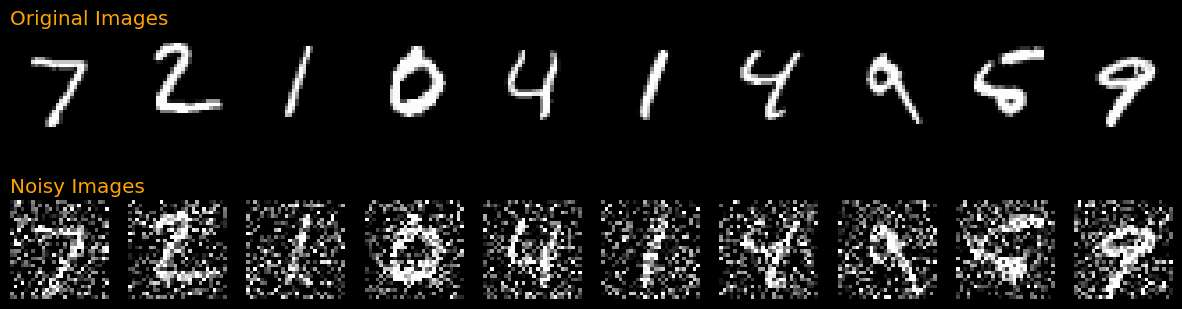

In [57]:
# Get some sample images to visualize the results
sample_images = x_test_noisy[:10]

# Plot the results
plt.figure(figsize=(15, 4))
for i in range(10):
  #plot the original images
  plt.subplot(2, 10, i +1)
  plt.imshow(x_test[i].reshape(28,28), cmap='gray')
  plt.axis('off')
  if i == 0:
    plt.title('Original Images', color='orange', loc='left')

  #plot the noisy images
  plt.subplot(2, 10, i +11)
  plt.imshow(x_test_noisy[i].reshape(28,28), cmap='gray')
  plt.axis('off')
  if i == 0:
    plt.title('Noisy Images', color='orange', loc='left')



- `add_noise` function adds Gaussian noise to the images to simulate real-world noisy conditions.
- The `noise_factor` can be adjusted to control how much noise is added to the images.

### **3. Build the Autoencoder Model:**

An autoencoder consists of two parts: an **encoder** (which compresses the input into a lower-dimensional representation) and a **decoder** (which reconstructs the input from the lower-dimensional representation).


In [45]:
# Build the Autoencoder

input_img = layers.Input(shape=(28, 28, 1))

# Encoder
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Model
autoencoder = models.Model(input_img, decoded)

In [46]:
# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [47]:
autoencoder.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_4 (UpSampling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 14, 14, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_5 (UpSampling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,497 (291.00 KB)

 Trainable params: 74,497 (291.00 KB)

 Non-trainable params: 0 (0.00 B)


### **4. Train the Autoencoder:**

You will train the autoencoder using the noisy images (`x_train_noisy`) as inputs and the clean images (`x_train`) as the target outputs.


In [48]:
# Train the autoencoder
model_hist = autoencoder.fit(x_train_noisy,x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 66ms/step - loss: 0.2259 - val_loss: 0.1116
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - loss: 0.1109 - val_loss: 0.1045
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - loss: 0.1049 - val_loss: 0.1015
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 0.1022 - val_loss: 0.0999
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - loss: 0.1006 - val_loss: 0.0987
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 0.0993 - val_loss: 0.0979
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 24s 52ms/step - loss: 0.0982 - val_loss: 0.0971
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - loss: 0.0973 - val_loss: 0.0962
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - loss: 0.0968 - val_loss: 0.0959
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - loss: 0.0963 - val_loss: 0.0953


Text(0.5, 1.0, 'Training and Validation Loss')

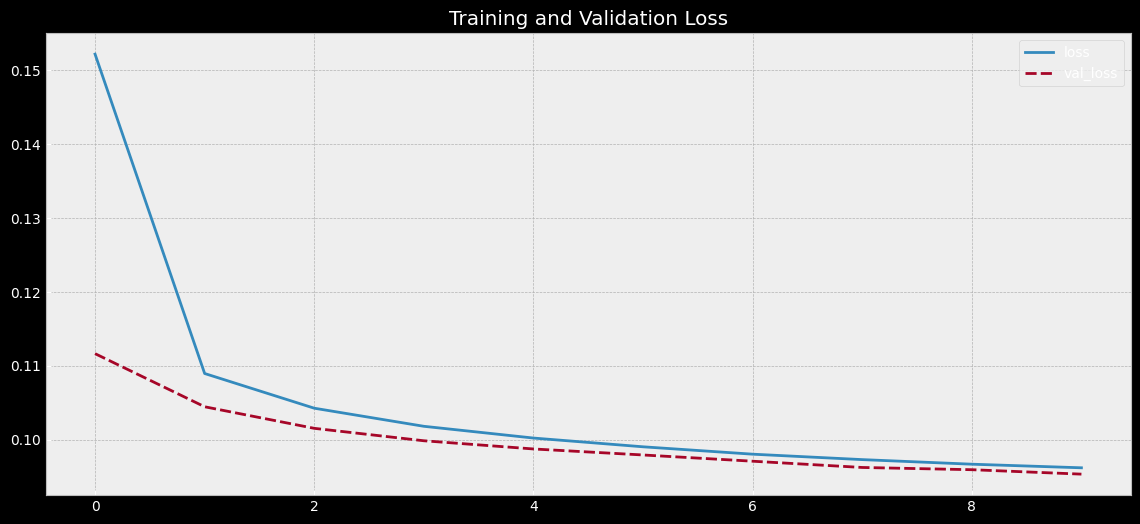

In [49]:

plt.style.use('bmh')

history_df = pd.DataFrame(model_hist.history)
plt.figure(figsize=(14,6))
# Plot training & validation accuracy values
sns.lineplot(data=history_df[['loss', 'val_loss']])
plt.title('Training and Validation Loss')


### **5. Evaluate and Visualize Results:**

Once the model is trained, you can use it to denoise some test images. Compare the original clean image, the noisy image, and the denoised image produced by the autoencoder.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


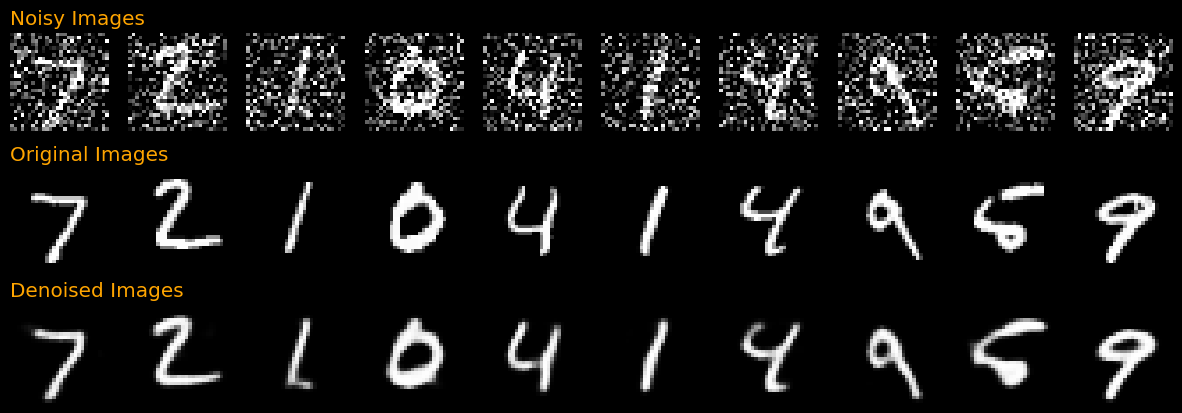

In [56]:
# Get some sample images to visualize the results
sample_images = x_test_noisy[:10]
denoised_images = autoencoder.predict(sample_images)

# Plot the results
plt.figure(figsize=(15, 5))
for i in range(10):
    # Plot original noisy image
    plt.subplot(3, 10, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    if i == 0:
        plt.title('Noisy Images', color='orange', loc='left')

    # Plot ground truth clean image
    plt.subplot(3, 10, i + 11)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    if i == 0:
        plt.title('Original Images', color='orange', loc='left')

    # Plot denoised image from the autoencoder
    plt.subplot(3, 10, i + 21)
    plt.imshow(denoised_images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    if i == 0:
        plt.title('Denoised Images', color='orange', loc='left')


### Using New/Custom Data

In [58]:
import cv2
import numpy as np

def preprocess_image_for_mnist_autoencoder(img_path):
    # Read the image
    img = cv2.imread(img_path)
    
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Resize to 28x28
    resized = cv2.resize(gray, (28, 28))
    
    # Normalize to [0, 1]
    normalized = resized.astype('float32') / 255.0
    
    # Reshape to (1, 28, 28, 1) for model prediction
    reshaped = normalized.reshape(1, 28, 28, 1)
    
    return reshaped


In [64]:
#from tensorflow.keras.models import load_model
# Load your trained MNIST autoencoder
#autoencoder = load_model('mnist_autoencoder.h5')

# Preprocess your image
path = '/Users/bassel_instructor/Documents/Datasets/'
input_img = preprocess_image_for_mnist_autoencoder(path+'letter_B_noise.png')

# Predict denoised output
denoised_img = autoencoder.predict(input_img)




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


(-0.5, 27.5, 27.5, -0.5)

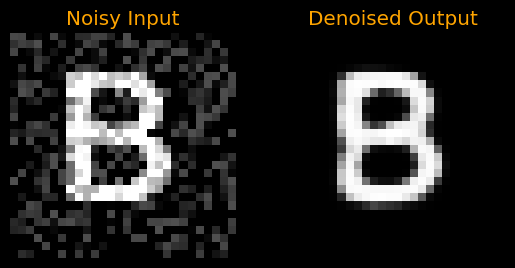

In [ ]:
# Visualize
plt.subplot(1, 2, 1)
plt.title("Noisy Input", color='orange')
plt.imshow(input_img[0].squeeze(), cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Denoised Output", color='orange')
plt.imshow(denoised_img[0].squeeze(), cmap='gray')
plt.axis('off')





### **6. Fine-Tuning:**
- Experiment with different architectures: You can try more complex models with deeper layers, different kernel sizes, or additional types of layers like **batch normalization** or **dropout** to improve performance.
- Try **adding noise** with different levels (adjust `noise_factor`) to see how well your model generalizes to various types of noise.



---

### **Additional Extensions and Ideas:**
1. **Use CIFAR-10 or other image datasets**: Instead of MNIST, you can try a more complex dataset like CIFAR-10 to denoise color images.
2. **Compare with other denoising methods**: Explore other denoising techniques like **Convolutional Denoising Autoencoders** (CDAE) or traditional denoising algorithms.
3. **Use deeper architectures**: If the results on the basic model are not satisfactory, try deeper architectures or more advanced models like **Variational Autoencoders** (VAE).
4. **Evaluate with PSNR (Peak Signal-to-Noise Ratio)**: Use PSNR or other image quality metrics to quantitatively evaluate the denoising performance.

### **Conclusion:**
This project demonstrates how an **autoencoder** can be used for **image denoising**. By training an autoencoder on noisy images, the model learns to remove the noise and reconstruct clean images. This approach can be extended to more complex datasets and architectures as you explore deep learning models for image preprocessing tasks.

# Advanced - Using SID Data
- The See-in-the-Dark (SID) dataset contains 5094 raw short-exposure images, each with a corresponding long-exposure reference image. Images were captured using two cameras: Sony α7SII and Fujifilm X-T2.
- Link: https://paperswithcode.com/dataset/sid
- Download the data https://ln5.sync.com/dl/ad8546d50/view/default/13207884540008#2atz8rpn-gjq5s8dq-u2revfvg-q2egqetr

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import glob
import cv2
import os

# --- Dataset Loader (adjust path as needed) ---
def load_sid_rgb_dataset(data_dir, size=(512, 512)):
    noisy_imgs = []
    clean_imgs = []

    noisy_files = sorted(glob.glob(os.path.join(data_dir, 'noisy', '*.png')))
    clean_files = sorted(glob.glob(os.path.join(data_dir, 'clean', '*.png')))

    for nf, cf in zip(noisy_files, clean_files):
        noisy = cv2.imread(nf)
        clean = cv2.imread(cf)

        noisy = cv2.resize(noisy, size)
        clean = cv2.resize(clean, size)

        noisy = noisy.astype(np.float32) / 255.0
        clean = clean.astype(np.float32) / 255.0

        noisy_imgs.append(noisy)
        clean_imgs.append(clean)

    return np.array(noisy_imgs), np.array(clean_imgs)

# --- Load dataset (assumes PNG RGB crops) ---
x_train_noisy, x_train_clean = load_sid_rgb_dataset('/path/to/SID_dataset/train')

# --- Autoencoder model ---
input_img = layers.Input(shape=(512, 512, 3))

# Encoder
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)  # 512 → 256
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)  # 256 → 128
x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)  # 128 → 64

# Decoder
x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)  # 64 → 128
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)  # 128 → 256
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)  # 256 → 512
decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

autoencoder.summary()

# --- Train ---
autoencoder.fit(x_train_noisy, x_train_clean,
                epochs=50,
                batch_size=4,
                shuffle=True,
                validation_split=0.1)

# --- Save model ---
autoencoder.save("sid_denoising_autoencoder.h5")
